In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


ratings = pd.read_csv('ratings.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'movie_id', 'rating'])


users = pd.read_csv('users.csv', sep='\t', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])


movies = pd.read_csv('movies.csv', sep='\t', encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

In [2]:
ratings.head()

,user_id,movie_id,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 3 columns):
user_id     1000209 non-null int64
movie_id    1000209 non-null int64
rating      1000209 non-null int64
dtypes: int64(3)
memory usage: 22.9 MB


In [4]:
users.head()

,user_id,gender,zipcode,age_desc,occ_desc
0,1,F,48067,Under 18,K-12 student
1,2,M,70072,56+,self-employed
2,3,M,55117,25-34,scientist
3,4,M,02460,45-49,executive/managerial
4,5,M,55455,25-34,writer


In [5]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id     6040 non-null int64
gender      6040 non-null object
zipcode     6040 non-null object
age_desc    6040 non-null object
occ_desc    6040 non-null object
dtypes: int64(1), object(4)
memory usage: 236.1+ KB


In [6]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genres      3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


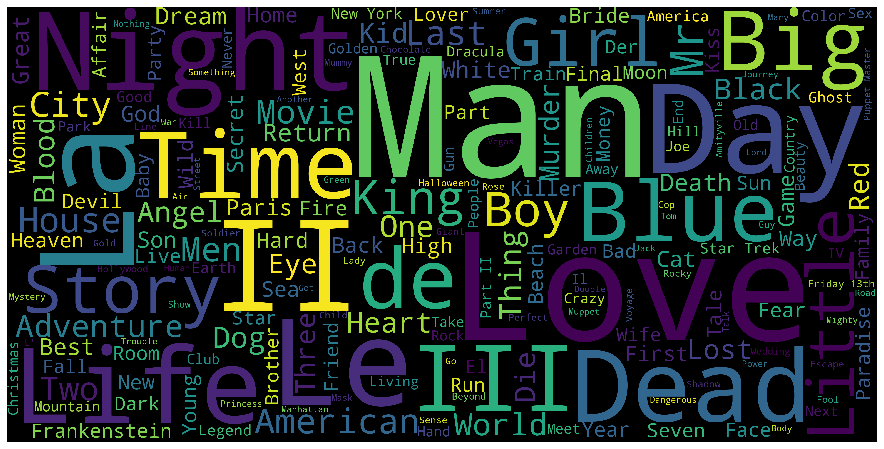

In [8]:
%matplotlib inline
import wordcloud
from wordcloud import WordCloud, STOPWORDS

movies['title'] = movies['title'].fillna("").astype('str')
title_corpus = ' '.join(movies['title'])
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', height=2000, width=4000).generate(title_corpus)

plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

In [9]:
ratings['rating'].describe()

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

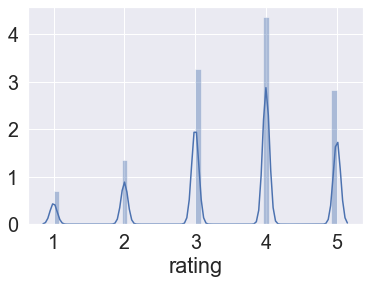

In [10]:
import seaborn as sns
sns.set_style('whitegrid')
sns.set(font_scale=1.8)
%matplotlib inline


sns.distplot(ratings['rating'].fillna(ratings['rating'].median()))

In [11]:
dataset = pd.merge(pd.merge(movies, ratings),users)

dataset[['title','genres','rating']].sort_values('rating', ascending=False).head(20)

,title,genres,rating
0,Toy Story (1995),Animation|Children's|Comedy,5
489283,American Beauty (1999),Comedy|Drama,5
489259,Election (1999),Comedy,5
489257,"Matrix, The (1999)",Action|Sci-Fi|Thriller,5
489256,Dead Ringers (1988),Drama|Thriller,5
489237,Rushmore (1998),Comedy,5
489236,"Simple Plan, A (1998)",Crime|Thriller,5
489226,Hands on a Hard Body (1996),Documentary,5
489224,Pleasantville (1998),Comedy,5
489212,Say Anything... (1989),Comedy|Drama|Romance,5


In [12]:

genre_labels = set()
for s in movies['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))


def count_word(dataset, ref_col, census):
    keyword_count = dict()
    for s in census: 
        keyword_count[s] = 0
    for census_keywords in dataset[ref_col].str.split('|'):        
        if type(census_keywords) == float and pd.isnull(census_keywords): 
            continue        
        for s in [s for s in census_keywords if s in census]: 
            if pd.notnull(s): 
                keyword_count[s] += 1

    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count


keyword_occurences, dum = count_word(movies, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 1603],
 ['Comedy', 1200],
 ['Action', 503],
 ['Thriller', 492],
 ['Romance', 471]]

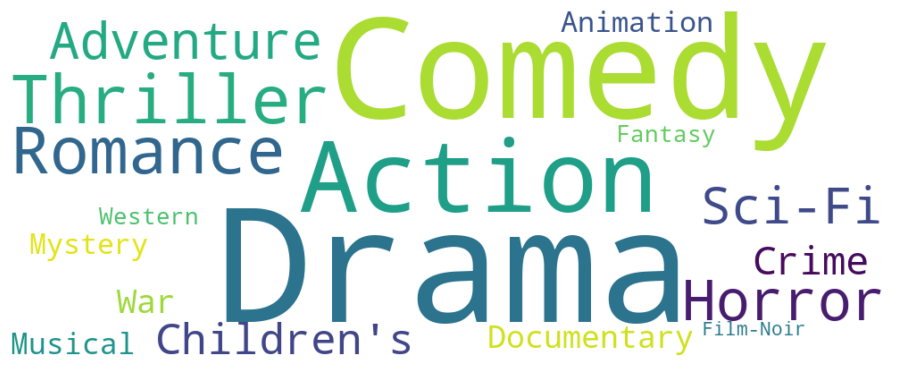

In [13]:

genres = dict()
trunc_occurences = keyword_occurences[0:18]
for s in trunc_occurences:
    genres[s[0]] = s[1]


genre_wordcloud = WordCloud(width=1000,height=400, background_color='white')
genre_wordcloud.generate_from_frequencies(genres)


f, ax = plt.subplots(figsize=(16, 8))
plt.imshow(genre_wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [14]:

movies['genres'] = movies['genres'].str.split('|')

movies['genres'] = movies['genres'].fillna("").astype('str')

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(analyzer='word',ngram_range=(1, 2),min_df=0, stop_words='english')
tfidf_matrix = tf.fit_transform(movies['genres'])
tfidf_matrix.shape

(3883, 127)

In [16]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
cosine_sim[:4, :4]

array([[1.        , 0.14193614, 0.09010857, 0.1056164 ],
       [0.14193614, 1.        , 0.        , 0.        ],
       [0.09010857, 0.        , 1.        , 0.1719888 ],
       [0.1056164 , 0.        , 0.1719888 , 1.        ]])

In [17]:

titles = movies['title']
indices = pd.Series(movies.index, index=movies['title'])


def genre_recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [18]:
genre_recommendations('Good Will Hunting (1997)').head(20)

25                                        Othello (1995)
26                                   Now and Then (1995)
29     Shanghai Triad (Yao a yao yao dao waipo qiao) ...
30                                Dangerous Minds (1995)
35                               Dead Man Walking (1995)
39                       Cry, the Beloved Country (1995)
42                                    Restoration (1995)
52                                       Lamerica (1994)
54                                        Georgia (1995)
56                          Home for the Holidays (1995)
61                             Mr. Holland's Opus (1995)
66                                       Two Bits (1995)
77                            Crossing Guard, The (1995)
79          White Balloon, The (Badkonake Sefid ) (1995)
81                       Antonia's Line (Antonia) (1995)
82       Once Upon a Time... When We Were Colored (1995)
89                    Journey of August King, The (1995)
92                             

In [19]:
genre_recommendations('Toy Story (1995)').head(20)

1050               Aladdin and the King of Thieves (1996)
2072                             American Tail, An (1986)
2073           American Tail: Fievel Goes West, An (1991)
2285                            Rugrats Movie, The (1998)
2286                                 Bug's Life, A (1998)
3045                                   Toy Story 2 (1999)
3542                                Saludos Amigos (1943)
3682                                   Chicken Run (2000)
3685       Adventures of Rocky and Bullwinkle, The (2000)
236                                 Goofy Movie, A (1995)
12                                           Balto (1995)
241                               Gumby: The Movie (1995)
310                             Swan Princess, The (1994)
592                                      Pinocchio (1940)
612                                Aristocats, The (1970)
700                               Oliver & Company (1988)
876     Land Before Time III: The Time of the Great Gi...
1010          

In [20]:

genre_recommendations('Matrix, The (1999)').head(20)

283                Nemesis 2: Nebula (1995)
585       Terminator 2: Judgment Day (1991)
683                             Solo (1996)
738                     Arrival, The (1996)
1024              Lawnmower Man, The (1992)
1220                 Terminator, The (1984)
1533                        Face/Off (1997)
1763                   Lost in Space (1998)
2502                     Matrix, The (1999)
2531                        eXistenZ (1999)
2653                   Deep Blue Sea (1999)
3458                        Predator (1987)
3628                      Predator 2 (1990)
375                          Timecop (1994)
401     Highlander III: The Sorcerer (1994)
438                   Demolition Man (1993)
500                        No Escape (1994)
728                        Barb Wire (1996)
1362        Adrenalin: Fear the Rush (1996)
1491              Fifth Element, The (1997)
Name: title, dtype: object

In [21]:

ratings['user_id'] = ratings['user_id'].fillna(0)
ratings['movie_id'] = ratings['movie_id'].fillna(0)

ratings['rating'] = ratings['rating'].fillna(ratings['rating'].mean())

In [22]:

small_data = ratings.sample(frac=0.02)

print(small_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20004 entries, 920052 to 109413
Data columns (total 3 columns):
user_id     20004 non-null int64
movie_id    20004 non-null int64
rating      20004 non-null int64
dtypes: int64(3)
memory usage: 625.1 KB
None


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [24]:
train_data = small_data.sample(frac=0.8)
test_data = small_data.sample(frac = 0.2)

In [25]:
train_data_matrix = train_data.as_matrix(columns = ['user_id', 'movie_id', 'rating'])
test_data_matrix = test_data.as_matrix(columns = ['user_id', 'movie_id', 'rating'])


print(train_data_matrix.shape)
print(test_data_matrix.shape)

(16003, 3)
(4001, 3)


/Users/rowem5/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/rowem5/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [26]:
from sklearn.metrics.pairwise import pairwise_distances


user_correlation = 1 - pairwise_distances(train_data, metric='correlation')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation[:4, :4])

[[ 1.          0.61892846  0.37079069  0.85589359]
 [ 0.61892846  1.          0.95895081  0.12354125]
 [ 0.37079069  0.95895081  1.         -0.16293017]
 [ 0.85589359  0.12354125 -0.16293017  1.        ]]


In [27]:

item_correlation = 1 - pairwise_distances(train_data_matrix.T, metric='correlation')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation[:4, :4])

[[ 1.         -0.00680638  0.00558297]
 [-0.00680638  1.         -0.06178851]
 [ 0.00558297 -0.06178851  1.        ]]


In [28]:

def predict(ratings, similarity, type='user'):
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1)
        ratings_diff = (ratings - mean_user_rating[:, np.newaxis])
        pred = mean_user_rating[:, np.newaxis] + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    return pred

In [29]:
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [30]:

user_prediction = predict(train_data_matrix, user_correlation, type='user')
item_prediction = predict(train_data_matrix, item_correlation, type='item')

print('User-based CF RMSE: ' + str(rmse(user_prediction, test_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data_matrix)))

User-based CF RMSE: 1412.651585506442
Item-based CF RMSE: 1640.4326844208122


In [31]:

print('User-based CF RMSE: ' + str(rmse(user_prediction, train_data_matrix)))
print('Item-based CF RMSE: ' + str(rmse(item_prediction, train_data_matrix)))

User-based CF RMSE: 697.5897859675268
Item-based CF RMSE: 115.1221685035481


In [32]:
neural = pd.merge(ratings, users, how = 'inner', on = 'user_id')

In [33]:
neural = pd.merge(neural, movies, how = 'inner', on = 'movie_id')

In [34]:
neural = neural.drop(columns = 'title')

In [35]:
neural


,user_id,movie_id,rating,gender,zipcode,age_desc,occ_desc,genres
0,1,1193,5,F,48067,Under 18,K-12 student,['Drama']
1,2,1193,5,M,70072,56+,self-employed,['Drama']
2,12,1193,4,M,32793,25-34,programmer,['Drama']
3,15,1193,4,M,22903,25-34,executive/managerial,['Drama']
4,17,1193,5,M,95350,50-55,academic/educator,['Drama']
...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,M,47901,18-24,technician/engineer,['Documentary']
1000205,5675,2703,3,M,30030,35-44,sales/marketing,['Drama']
1000206,5780,2845,1,M,92886,18-24,technician/engineer,['Drama']
1000207,5851,3607,5,F,55410,18-24,writer,"['Comedy', 'Drama', 'Western']"


In [36]:
import tensorflow.keras

In [37]:
neural['gender'].replace('M', 1, inplace = True)
neural['gender'].replace('F', 0, inplace = True)

In [38]:
neural.head()

,user_id,movie_id,rating,gender,zipcode,age_desc,occ_desc,genres
0,1,1193,5,0,48067,Under 18,K-12 student,['Drama']
1,2,1193,5,1,70072,56+,self-employed,['Drama']
2,12,1193,4,1,32793,25-34,programmer,['Drama']
3,15,1193,4,1,22903,25-34,executive/managerial,['Drama']
4,17,1193,5,1,95350,50-55,academic/educator,['Drama']


In [39]:
neural['age_desc'].unique()

array(['Under 18', '56+', '25-34', '50-55', '18-24', '45-49', '35-44'],
      dtype=object)

In [40]:
neural['age_desc'].replace('Under 18', 0, inplace = True)
neural['age_desc'].replace('18-24', 1, inplace = True)
neural['age_desc'].replace('25-34', 2, inplace = True)
neural['age_desc'].replace('35-44', 3, inplace = True)
neural['age_desc'].replace('45-49', 4, inplace = True)
neural['age_desc'].replace('50-55', 5, inplace = True)
neural['age_desc'].replace('56+', 6, inplace = True)

In [41]:
neural['occ_desc'].replace('K-12 student', 0, inplace = True)
neural['occ_desc'].replace('self-employed', 1, inplace = True)
neural['occ_desc'].replace('programmer', 2, inplace = True)
neural['occ_desc'].replace('executive/managerial', 3, inplace = True)
neural['occ_desc'].replace('academic/educator', 4, inplace = True)
neural['occ_desc'].replace('clerical/admin', 5, inplace = True)
neural['occ_desc'].replace('college/grad student', 6, inplace = True)
neural['occ_desc'].replace('farmer', 7, inplace = True)
neural['occ_desc'].replace('technician/engineer', 8, inplace = True)
neural['occ_desc'].replace('other or not specified', 9, inplace = True)
neural['occ_desc'].replace('artist', 10, inplace = True)
neural['occ_desc'].replace('homemaker', 11, inplace = True)
neural['occ_desc'].replace('unemployed', 12, inplace = True)
neural['occ_desc'].replace('tradesman/craftsman', 13, inplace = True)
neural['occ_desc'].replace('scientist', 14, inplace = True)
neural['occ_desc'].replace('lawyer', 15, inplace = True)
neural['occ_desc'].replace('writer', 16, inplace = True)
neural['occ_desc'].replace('retired', 17, inplace = True)
neural['occ_desc'].replace('customer service', 18, inplace = True)
neural['occ_desc'].replace('sales/marketing', 19, inplace = True)
neural['occ_desc'].replace('doctor/health care', 20, inplace = True)


In [42]:
neural

,user_id,movie_id,rating,gender,zipcode,age_desc,occ_desc,genres
0,1,1193,5,0,48067,0,0,['Drama']
1,2,1193,5,1,70072,6,1,['Drama']
2,12,1193,4,1,32793,2,2,['Drama']
3,15,1193,4,1,22903,2,3,['Drama']
4,17,1193,5,1,95350,5,4,['Drama']
...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,1,47901,1,8,['Documentary']
1000205,5675,2703,3,1,30030,3,19,['Drama']
1000206,5780,2845,1,1,92886,1,8,['Drama']
1000207,5851,3607,5,0,55410,1,16,"['Comedy', 'Drama', 'Western']"


In [48]:
neural_sample = neural.sample(frac = .1)

In [49]:
neural_sample

,user_id,movie_id,rating,gender,zipcode,age_desc,occ_desc,genres
858580,2887,880,2,1,66205,2,5,"['Sci-Fi', 'Thriller']"
413392,4172,1223,5,1,19901,3,3,"['Animation', 'Comedy']"
148906,2125,3809,3,1,46033,3,5,['Comedy']
633316,3982,2173,2,1,95929,6,17,"['Adventure', 'Fantasy', 'Sci-Fi']"
109942,5076,2858,4,1,19147,2,5,"['Comedy', 'Drama']"
...,...,...,...,...,...,...,...,...
600326,4141,762,4,1,95014,3,8,"['Comedy', 'Crime']"
850890,4227,1353,1,1,11414-2520,2,12,"['Comedy', 'Romance']"
375742,1865,111,3,0,94606,1,4,"['Drama', 'Thriller']"
518084,2343,2946,3,0,01604,4,4,"['Comedy', 'Musical']"


In [50]:
y_orig = neural_sample['rating']
x_orig = neural_sample.drop(columns='rating') 
x_orig = x_orig.drop(columns='genres') 
x_orig = x_orig.drop(columns='user_id') 
x_orig = x_orig.drop(columns='zipcode') 

In [51]:
from sklearn import preprocessing, model_selection


x, x_test, y, y_test = model_selection.train_test_split(x_orig,y_orig)

scaler = preprocessing.StandardScaler()
x = scaler.fit_transform(x)
x_test = scaler.fit_transform(x_test)

In [52]:
from sklearn import metrics

def benchmark(model):
    y_pred = model.predict(x_test)

    print(f"mae: {metrics.mean_absolute_error(y_test, y_pred):,.2f}")
    print(f"mse: {metrics.mean_squared_error(y_test, y_pred):,.2f}")

In [77]:
DROP = 0.05
student_model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.InputLayer(input_shape=x.shape[1:]),
    tensorflow.keras.layers.Dense(units=30, activation="relu",
                      kernel_regularizer=tensorflow.keras.regularizers.l2(30)),
    tensorflow.keras.layers.Dropout(DROP),
    tensorflow.keras.layers.Dense(units=20, activation="relu",
                       kernel_regularizer=tensorflow.keras.regularizers.l2(20)),
    tensorflow.keras.layers.Dropout(DROP),
    tensorflow.keras.layers.Dense(units=10, activation="relu",
                        kernel_regularizer=tensorflow.keras.regularizers.l2(10)),
    tensorflow.keras.layers.Dropout(DROP),
#     tensorflow.keras.layers.Dense(units=485, activation="relu",
#                         kernel_regularizer=tensorflow.keras.regularizers.l2(485)),
    #tensorflow.keras.layers.Dropout(DROP),
    #tensorflow.keras.layers.Dense(units=1, activation="relu",
    #                    kernel_regularizer=tensorflow.keras.regularizers.l2(1)),
#     tensorflow.keras.layers.Dropout(.5*DROP),
#     tensorflow.keras.layers.Dense(units=40, activation="relu",
#                        kernel_regularizer=tensorflow.keras.regularizers.l2(L2)),
#     tensorflow.keras.layers.Dropout(.5*DROP),
#     tensorflow.keras.layers.Dense(units=20, activation="relu",
#                        kernel_regularizer=tensorflow.keras.regularizers.l2(L2)),
#     keras.layers.Dropout(DROP),
    tensorflow.keras.layers.Dense(units=5),
])
student_model.compile(
    tensorflow.keras.optimizers.Adam(lr=0.01), loss="mean_absolute_error",
    metrics=["mean_absolute_error", "mean_squared_error"])
student_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 30)                150       
_________________________________________________________________
dropout_17 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_34 (Dense)             (None, 20)                620       
_________________________________________________________________
dropout_18 (Dropout)         (None, 20)                0         
_________________________________________________________________
dense_35 (Dense)             (None, 10)                210       
_________________________________________________________________
dropout_19 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_36 (Dense)             (None, 5)                

In [78]:
student_model.fit(
    x, y, epochs=30, validation_split=.25, verbose=1, callbacks=[
        tensorflow.keras.callbacks.EarlyStopping(
            restore_best_weights = True,
            patience=10,
            verbose=1,
        ),
        tensorflow.keras.callbacks.ReduceLROnPlateau(
            factor=.5,
            patience=5,
            verbose=1,
        ),
    ])

Train on 56261 samples, validate on 18754 samples
Epoch 1/30
56261/56261 [==============================] - 2s 38us/sample - loss: 6.0944 - mean_absolute_error: 0.9498 - mean_squared_error: 1.5829 - val_loss: 0.9024 - val_mean_absolute_error: 0.9024 - val_mean_squared_error: 1.3409
Epoch 2/30
56261/56261 [==============================] - 2s 30us/sample - loss: 0.9001 - mean_absolute_error: 0.8999 - mean_squared_error: 1.3864 - val_loss: 0.8995 - val_mean_absolute_error: 0.8991 - val_mean_squared_error: 1.3543
Epoch 3/30
56261/56261 [==============================] - 2s 30us/sample - loss: 0.8950 - mean_absolute_error: 0.8948 - mean_squared_error: 1.3833 - val_loss: 0.8898 - val_mean_absolute_error: 0.8887 - val_mean_squared_error: 1.4039
Epoch 4/30
56261/56261 [==============================] - 2s 30us/sample - loss: 0.8908 - mean_absolute_error: 0.8903 - mean_squared_error: 1.3853 - val_loss: 0.8942 - val_mean_absolute_error: 0.8920 - val_mean_squared_error: 1.3868
Epoch 5/30
56261/5

In [108]:
users[users['user_id'] == 156]

,user_id,gender,zipcode,age_desc,occ_desc
155,156,F,14519,45-49,executive/managerial


In [79]:
pred_func = lambda x: student_model.predict(x)